<a href="https://colab.research.google.com/github/albert-h-wong/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
y_bivar = df['price']
X_bivar = df['sqft_living'].values[:, np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X_bivar, y_bivar, test_size=.5, random_state=42)

print(X_bivar.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21613, 1) 

(10806, 1)
(10807, 1)
(10806,)
(10807,)


In [18]:
bivar_model = LinearRegression()
modelfit = bivar_model.fit(X_train, Y_train)

print("Coefficient: \n", bivar_model.coef_)
print("\n Intercept: ", bivar_model.intercept_)

Coefficient: 
 [268.42931803]

 Intercept:  -20631.156554487883


In [5]:
y_test_predict = bivar_model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 75628624138.70985
RMSE is 275006.58926416625
R^2 is 0.49226256935760826


Text(0.5,1,'Sqft and Price')

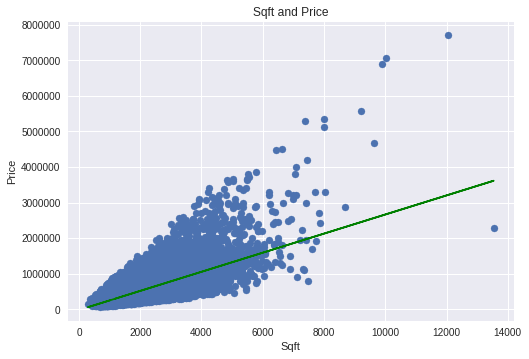

In [17]:
m_hat = bivar_model.coef_[0]
b_hat = bivar_model.intercept_

# Plot the points
plt.scatter(df.sqft_living, df.price)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X_bivar]
plt.plot(X_bivar, y_hat, color='g')

# Graph axes and title
plt.ylabel("Price")
plt.xlabel("Sqft")
plt.title("Sqft and Price")


Text(0.5,1,'Sqft and Price')

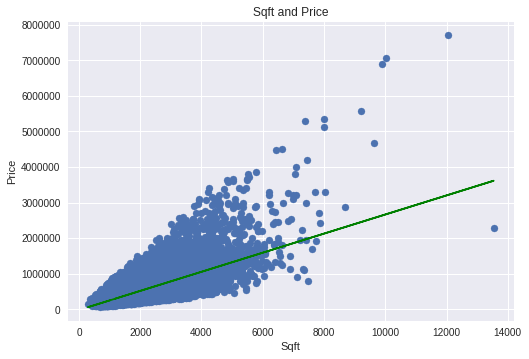

In [21]:
# Use model.predict as alternative 

plt.scatter(df.sqft_living, df.price)
Y_hat = modelfit.predict(X_bivar)
plt.plot(X_bivar, Y_hat, color='g')


plt.ylabel("Price")
plt.xlabel("Sqft")
plt.title("Sqft and Price")


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [9]:
y_mvar1 = df.loc[:, ['price']].values
X_mvar1 = df.loc[:, ['sqft_living','grade']].values

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_mvar1, y_mvar1, test_size=.5, random_state=42)

print(X_mvar1.shape, "\n")

print(X_train2.shape)
print(X_test2.shape)
print(Y_train2.shape)
print(Y_test2.shape)

(21613, 2) 

(10806, 2)
(10807, 2)
(10806, 1)
(10807, 1)


In [24]:
model2 = LinearRegression()
model2.fit(X_train2, Y_train2)

print("Coefficient: \n", model2.coef_)
print("\n Intercept: ", model2.intercept_)

Coefficient: 
 [[   167.10832275 103065.16259903]]

 Intercept:  [-599835.66185812]


In [11]:
y_test_predict2 = model2.predict(X_test2)

MSE = mean_squared_error(Y_test2, y_test_predict2)

RMSE = (np.sqrt(mean_squared_error(Y_test2, y_test_predict2)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test2, y_test_predict2)

print('R^2 is {}'.format(R2))

MSE is 70544952427.10252
RMSE is 265602.9977750675
R^2 is 0.5263921128006677


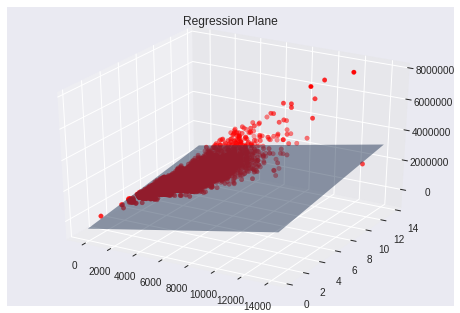

In [25]:
beta_0 = model2.intercept_
beta_i = model2.coef_[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['sqft_living'], df['grade'], df['price'],c='red')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [44]:
y_mvar2 = df['price']
X_mvar2 = df.drop(['price','id','date'], axis=1)

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_mvar2, y_mvar2, test_size=.5, random_state=42)

print(X_mvar2.shape, "\n")

print(X_train3.shape)
print(X_test3.shape)
print(Y_train3.shape)
print(Y_test3.shape)

(21613, 18) 

(10806, 18)
(10807, 18)
(10806,)
(10807,)


In [45]:
model3 = LinearRegression()
model3.fit(X_train3, Y_train3)

print("Coefficient: \n", model3.coef_)
print("\n Intercept: ", model3.intercept_)

Coefficient: 
 [-3.41930712e+04  3.97125261e+04  9.91229817e+01  1.04057427e-01
  1.00431682e+04  5.73273418e+05  5.36941305e+04  2.47210264e+04
  9.94432289e+04  6.02382105e+01  3.88847715e+01 -2.48044346e+03
  2.12570728e+01 -5.43588580e+02  5.91178244e+05 -1.85711473e+05
  2.64961862e+01 -3.65903971e-01]

 Intercept:  6705339.545452279


In [46]:
y_test_predict3 = model3.predict(X_test3)

MSE = mean_squared_error(Y_test3, y_test_predict3)

RMSE = (np.sqrt(mean_squared_error(Y_test3, y_test_predict3)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test3, y_test_predict3)

print('R^2 is {}'.format(R2))

MSE is 46526645704.63182
RMSE is 215700.36092837632
R^2 is 0.6876404957050217


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
